In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
%matplotlib inline

In [2]:
train = pd.read_csv('./datasets/train_cleaned_2.csv')

In [3]:
train.head(3)

,Id,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,Misc Feature_Othr,Misc Feature_Shed,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,60,0.0,13517,6,8,1976,2005,289.0,4,...,0,0,0,0,0,0,0,0,0,1
1,544,60,43.0,11492,7,5,1996,1997,132.0,4,...,0,0,0,0,0,0,0,0,0,1
2,153,20,68.0,7922,5,7,1953,2007,0.0,3,...,0,0,0,0,0,0,0,0,0,1


In [4]:
test = pd.read_csv('./datasets/test_cleaned.csv')

In [5]:
test.head(3)

,Id,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,Misc Feature_Shed,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,190,69.0,9142,6,8,1910,1950,0.0,3,...,0,0,0,0,0,0,0,0,0,1
1,2718,90,0.0,9662,5,4,1977,1977,0.0,3,...,0,0,0,0,0,0,0,0,0,1
2,2414,60,58.0,17104,7,5,2006,2006,0.0,4,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# list of columns in test set but not in train set
[i for i in test.columns if i not in train.columns]

['Roof Matl_Metal',
 'Roof Matl_Roll',
 'Exterior 1st_PreCast',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Mas Vnr Type_CBlock',
 'Heating_GasA',
 'Sale Type_VWD']

In [7]:
# remove said columns above from test set
test.drop([i for i in test.columns if i not in train.columns],
          axis = 1, inplace = True)

In [8]:
test.shape

(879, 192)

## Lasso Regression Model

In [9]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [12]:
lasso_optimal = LassoCV(n_alphas=500, cv=10, verbose=1)

lasso_optimal.fit(X_train_sc, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=500, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=1)

In [13]:
lasso = Lasso(alpha=lasso_optimal.alpha_)

In [14]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=420.4040112141259, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
lasso.score(X_train_sc, y_train)

0.9277235780063325

In [16]:
lasso.score(X_test_sc, y_test)

0.9029724232445159

In [17]:
cross_val_score(lasso,X_train_sc,y_train,cv=5).mean()

0.904970315674819

In [18]:
pred_test = lasso.predict(X_test_sc)

In [19]:
np.sqrt(mean_squared_error(y_test, pred_test).mean())

24451.316634472183

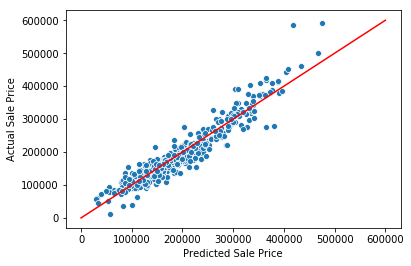

In [20]:
sns.scatterplot(pred_test, y_test)
plt.xlabel("Predicted Sale Price");
plt.ylabel("Actual Sale Price")
plt.plot([0, 600000], [0, 600000], c = "r")

In [21]:
lasso_coefs = pd.DataFrame({
    'feature':X.columns,
    'coef':lasso.coef_,
    'abs_coef':np.abs(lasso.coef_)
})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,feature,coef,abs_coef
24,Gr Liv Area,25146.315384,25146.315384
4,Overall Qual,11664.513605,11664.513605
15,BsmtFin SF 1,10236.888006,10236.888006
6,Year Built,7433.262634,7433.262634
19,Total Bsmt SF,7386.621437,7386.621437
87,Neighborhood_NridgHt,6845.250095,6845.250095
9,Exter Qual,6276.935150,6276.935150
5,Overall Cond,6004.167003,6004.167003
8,Mas Vnr Area,5512.942437,5512.942437
93,Neighborhood_StoneBr,5193.705330,5193.705330


## Kaggle Test Dataset Predictions

In [22]:
X = test

In [23]:
X_sc = ss.transform(X)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [24]:
test_pred = lasso.predict(X_sc)

In [25]:
test['test_pred'] = test_pred

In [26]:
submission_2 = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test['test_pred']
})

In [27]:
# submission_2.to_csv('./datasets/submission_2.csv', index = False)